In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Preparing Dataset

In [ ]:
tcga_normal = pd.read_csv("/content/comnormal.csv")
tcga_normal=tcga_normal.drop(tcga_normal.columns[0], axis=1)
tcga_normal=tcga_normal.drop(tcga_normal.columns[0], axis=1)
tcga_normal['y']="Normal"

tcga_blca = pd.read_csv("/content/comblca.csv")
tcga_blca=tcga_blca.drop(tcga_blca.columns[0], axis=1)
tcga_blca=tcga_blca.drop(tcga_blca.columns[0], axis=1)
tcga_blca['y']="BC"

urine_normal = pd.read_csv("/content/NL_100k_cyto_hg19.csv")
urine_normal=urine_normal.drop(urine_normal.columns[0], axis=1)
urine_normal=urine_normal.drop(urine_normal.columns[0], axis=1)
urine_normal['y']="Normal"

urine_blca = pd.read_csv("/content/BLCA_100k_cyto_hg19.csv")
urine_blca=urine_blca.drop(urine_blca.columns[0], axis=1)
urine_blca=urine_blca.drop(urine_blca.columns[0], axis=1)
urine_blca['y']="BC"

In [ ]:
print("====tcga_normal====")
print("dim : ",tcga_normal.shape)

print()
print("====tcga_blca====")
print("dim : ",tcga_blca.shape)

print()
print(len(tcga_normal.columns.intersection(tcga_blca.columns)))
print(tcga_normal.columns.difference(tcga_blca.columns))

tcga = pd.concat([tcga_normal, tcga_blca], axis=0, join='inner')
print()
print(tcga.shape)

tcga = tcga.rename(columns={'Sample':'id'})

====tcga_normal====
dim :  (388, 788)

====tcga_blca====
dim :  (409, 787)

787
Index(['<NA>'], dtype='object')

(797, 787)


In [ ]:
print("====urine_normal====")
print("dim : ",urine_normal.shape)

print()
print("====urine_blca====")
print("dim : ",urine_blca.shape)

print()
print(len(urine_normal.columns.intersection(urine_blca.columns)))

urine = pd.concat([urine_normal, urine_blca], axis=0, join='inner')
print()
print(urine.shape)

====urine_normal====
dim :  (28, 765)

====urine_blca====
dim :  (42, 765)

765

(70, 765)


In [ ]:
# tcga data <-> urine data
print("====tcga====")
print("dim : ",tcga.shape)

print()
print("====urine====")
print("dim : ",urine.shape)

print()
print(len(urine.columns.intersection(tcga.columns)))

# 겹치지 않는 컬럼 제거
common_columns = list(set(urine.columns).intersection(tcga.columns))

# 최종 데이터
urinef = urine[common_columns]
tcgaf = tcga[common_columns]

print()
print("====tcga final====")
print("dim : ",tcgaf.shape)

print()
print("====urine final====")
print("dim : ",urinef.shape)

print()
print("====difference====")
print(tcgaf.columns.difference(urinef.columns))

====tcga====
dim :  (797, 787)

====urine====
dim :  (70, 765)

763

====tcga final====
dim :  (797, 763)

====urine final====
dim :  (70, 763)

====difference====
Index([], dtype='object')


In [ ]:
len(set(urine.columns).intersection(tcga.columns))

763

In [ ]:
tcgaf.to_csv("/content/tcgaf.csv")
urinef.to_csv("/content/urinef.csv")

## EDA

In [ ]:
tcgaf.shape

(797, 763)

In [ ]:
urinef.shape

(70, 763)

In [ ]:
tcgaf.y.value_counts()

BC        409
Normal    388
Name: y, dtype: int64

In [ ]:
urinef.y.value_counts()

BC        42
Normal    28
Name: y, dtype: int64

In [ ]:
sum(tcgaf.isnull().sum())

0

In [ ]:
sum(urinef.isnull().sum())

0

In [ ]:
tcgaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 408
Columns: 763 entries, cyto.19q13.43 to cyto.3p22.1
dtypes: float64(762), object(1)
memory usage: 4.6+ MB


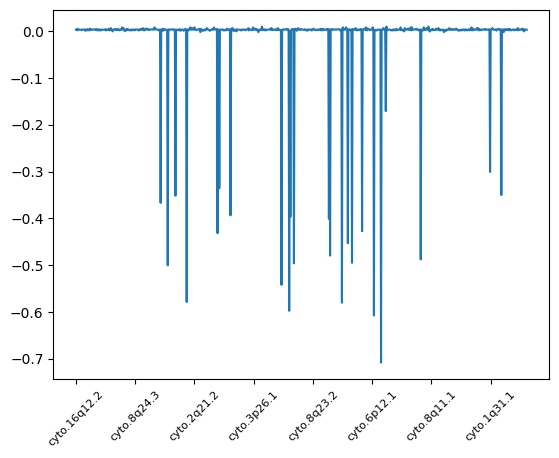

In [ ]:
pd.to_numeric(tcgaf.iloc[1, 1:765], errors='coerce').plot()
plt.tick_params(axis='x', labelsize=8, rotation=45)
plt.show()